## Observations and Insights 

- Capomulin and ramicane are more effective in shrinking tumor size and had more measurements than infubinol and ceftamine.
- Out of the total 248 mice in this study, 51% were male and 49% female. 
- Mouse weight and tumor volume are postively correlated.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mouse_study_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer") 


# Display the data table for preview
merge_mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = merge_mouse_study_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_mouse_study_data.loc[merge_mouse_study_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = pd.DataFrame(duplicate_mice)
all_duplicate_mice



,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = merge_mouse_study_data[merge_mouse_study_data['Mouse ID'].isin(duplicate_mice)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = mouse_study_clean['Mouse ID'].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = mouse_study_clean.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = mouse_study_clean.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median

regimen_var = mouse_study_clean.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_var

regimen_stand = mouse_study_clean.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_stand

regimen_sem = mouse_study_clean.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = pd.DataFrame({"Mean":regimen_mean,
                             "Median": regimen_median,
                             "Variance": regimen_var,
                             "Standard Deviation": regimen_stand,
                             "SEM": regimen_sem})

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

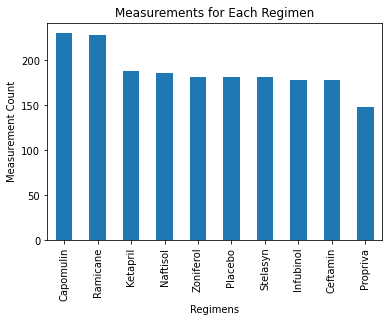

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#value count for drug regimen
regimen_data = mouse_study_clean['Drug Regimen'].value_counts()


#plot values, set title
regimen_count_bar = regimen_data.plot(kind='bar',title='Measurements for Each Regimen')

#set labels
regimen_count_bar.set_ylabel("Measurement Count")
regimen_count_bar.set_xlabel("Regimens")

plt.show()
plt.tight_layout()

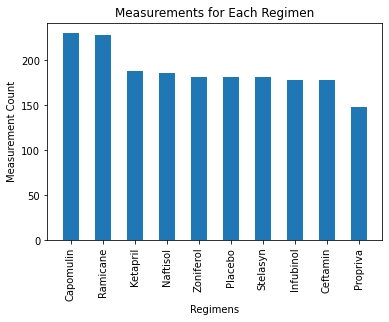

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(regimen_data))
y_axis = mouse_study_clean['Drug Regimen'].value_counts()

#plot bar, adjusted width
plt.bar(x_axis,y_axis, width = 0.5,zorder = 3)

#set tick locations
tick_location = [value for value in x_axis]
plt.xticks(tick_location, y_axis.index.values)

#rotate ticks
plt.xticks(rotation=90)

#add labels
plt.ylabel("Measurement Count")
plt.xlabel("Regimens")

#add title
plt.title("Measurements for Each Regimen")

#pshow plot
plt.show()

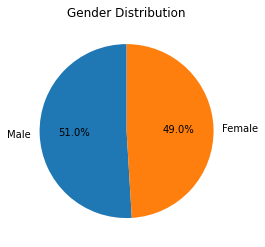

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = mouse_study_clean['Sex'].value_counts()

#plot values
pie_plot = gender_data.plot.pie(autopct="%1.1f%%",startangle=90,title="Gender Distribution")

#delete y label
pie_plot.set_ylabel('')

plt.show()
plt.tight_layout()


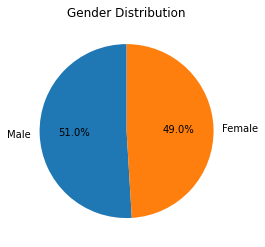

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%", startangle=90)

#add title
plt.title("Gender Distribution")

#show plot
plt.show()




## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#create dataframes 
capomulin_data = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin",:]
    
ramicane_data = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Ramicane",:]

infubinol_data = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Infubinol",:]

ceftamin_data = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Ceftamin",:]
                                      
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#find tumors for 



In [13]:
#find max timepoint for capomulin
capomulin_time = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_max = pd.DataFrame(capomulin_time)

#merge with original df
capomulin_merge = pd.merge(capomulin_max,mouse_study_clean,on=("Mouse ID","Timepoint"),how="left")

#find capomulin tumors
capomulin_tumors = capomulin_merge['Tumor Volume (mm3)']

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [14]:
#find max timepoint for ramicane
ramicane_time = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_max = pd.DataFrame(ramicane_time)

#merge with original df
ramicane_merge = pd.merge(ramicane_max,mouse_study_clean,on=("Mouse ID","Timepoint"),how="left")

#find ramicane tumors
ramicane_tumors = ramicane_merge['Tumor Volume (mm3)']

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is: 40.65900627
The interquartile range of ramicane is: 9.098536719999998
The the median of ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [15]:
#find max timepoint for infubinol
infubinol_time = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_max = pd.DataFrame(infubinol_time)

#merge with original df
infubinol_merge = pd.merge(infubinol_max,mouse_study_clean,on=("Mouse ID","Timepoint"),how="left")

#find infubinol tumors
infubinol_tumors = infubinol_merge['Tumor Volume (mm3)']

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infubinol is: {lowerq}")
print(f"The upper quartile of infubinol is: {upperq}")
print(f"The interquartile range of infubinol is: {iqr}")
print(f"The the median of infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 11.477135160000003
The the median of infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [16]:
#find max timepoint for ceftamin
ceftamin_time = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_max = pd.DataFrame(ceftamin_time)

#merge with original df
ceftamin_merge = pd.merge(ceftamin_max,mouse_study_clean,on=("Mouse ID","Timepoint"),how="left")

#find infubinol tumors
ceftamin_tumors = ceftamin_merge['Tumor Volume (mm3)']

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ceftamin is: {lowerq}")
print(f"The upper quartile of ceftamin is: {upperq}")
print(f"The interquartile range of ceftamin is: {iqr}")
print(f"The the median of ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin is: 48.72207785
The upper quartile of ceftamin is: 64.29983003
The interquartile range of ceftamin is: 15.577752179999997
The the median of ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


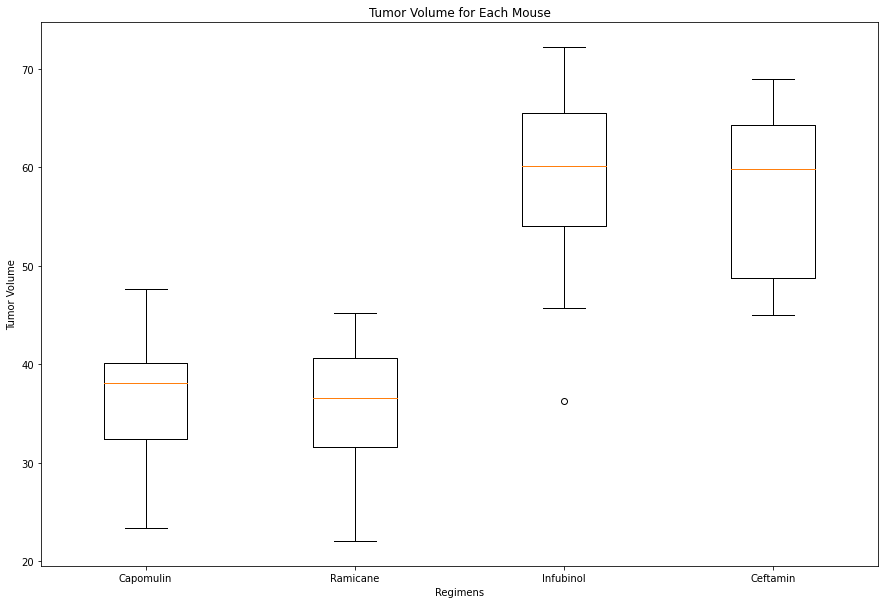

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [capomulin_tumors,ramicane_tumors,infubinol_tumors,ceftamin_tumors,]

regemin_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1,ax1= plt.subplots(figsize=(15,10))

ax1.set_title('Tumor Volume for Each Mouse')
ax1.boxplot(tumor_data,labels=regemin_list,widths=0.4,vert=True)
ax1.set_xlabel('Regimens')
ax1.set_ylabel('Tumor Volume')

plt.show()


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#print capomulin data and select mouse id
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


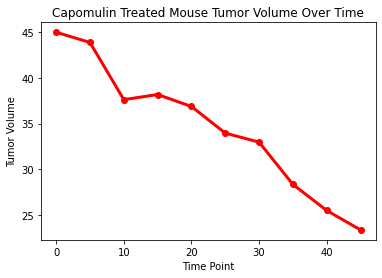

In [22]:
#define capomulin mouse data for line
line_data = capomulin_data.loc[capomulin_data["Mouse ID"]=="s185",:]
line_data.head()
x_axis = line_data['Timepoint']
y_axis = line_data['Tumor Volume (mm3)']

#plot line and apply labels
plt.plot(x_axis,y_axis,linewidth=3,markersize=6,marker="o",color="red")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Treated Mouse Tumor Volume Over Time")

plt.show()

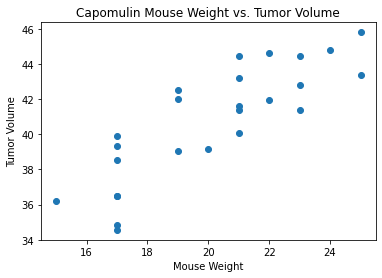

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data.head()
avg_mouse = capomulin_data.groupby('Mouse ID').mean()

#define values for scatter
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']

#plot scatter
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight') 
plt.ylabel('Tumor Volume')
plt.title('Capomulin Mouse Weight vs. Tumor Volume')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84
y = 0.95 x + 21.55


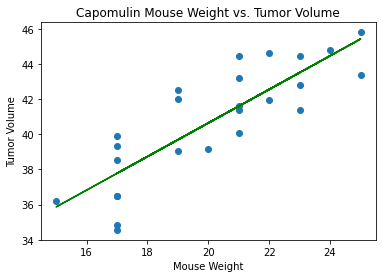

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

#plot scatter and line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
plt.xlabel('Mouse Weight') 
plt.ylabel('Tumor Volume')
plt.title('Capomulin Mouse Weight vs. Tumor Volume')
plt.show()
